In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('df1.csv')
import seaborn as sns

In [ ]:
df

,Unnamed: 0,hospital_bed_density,pol_parity,dem_ind,female_lead,gdp,social_support,healthy_life_expectancy,freedom,generosity,corruption,outcome
0,0,55.80,42.6,7.64,1.0,1.356,1.504,0.986,0.473,0.160,0.210,1
1,1,15.91,47.7,6.60,0.0,0.960,1.274,0.854,0.455,0.083,0.027,1
2,2,24.60,42.9,8.52,0.0,1.333,1.538,0.996,0.450,0.348,0.278,1
3,3,29.70,55.8,8.18,0.0,1.286,1.484,1.062,0.362,0.153,0.079,1
4,4,31.40,37.0,7.52,0.0,1.294,1.488,1.039,0.231,0.158,0.030,1
...,...,...,...,...,...,...,...,...,...,...,...,...
212810,212810,11.00,11.9,4.33,0.0,0.308,0.939,0.428,0.382,0.269,0.167,0
212811,212811,11.00,11.9,4.33,0.0,0.308,0.939,0.428,0.382,0.269,0.167,0
212812,212812,11.00,11.9,4.33,0.0,0.308,0.939,0.428,0.382,0.269,0.167,0
212813,212813,11.00,11.9,4.33,0.0,0.308,0.939,0.428,0.382,0.269,0.167,0


In [ ]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

In [ ]:
l = list(df.columns)
l

['hospital_bed_density',
 'pol_parity',
 'dem_ind',
 'female_lead',
 'gdp',
 'social_support',
 'healthy_life_expectancy',
 'freedom',
 'generosity',
 'corruption',
 'outcome']

In [ ]:
feats = ['hospital_bed_density',
 'pol_parity',
 'dem_ind',
 'female_lead',
 'gdp',
 'social_support',
 'healthy_life_expectancy',
 'freedom',
 'generosity',
 'corruption']

In [ ]:
X = df[feats]
y = df.outcome
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
clf = DecisionTreeClassifier(criterion = 'gini', splitter='best')

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.9651343096561986
Recall: 0.025607064017660046
Precision: 0.7532467532467533
F1: 0.049530315969257055


In [ ]:
from sklearn.tree import export_graphviz 
from IPython.display import Image  
import pydotplus as pdp
from sklearn import tree


dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=X_test.columns.tolist(),
                     class_names=['Recover', 'Death'],
                     filled=True, rounded=True,  
                     special_characters=True)  

graph = pdp.graph_from_dot_data(dot_data)
graph.write_png(str(100) + "decision_tree.png")

True

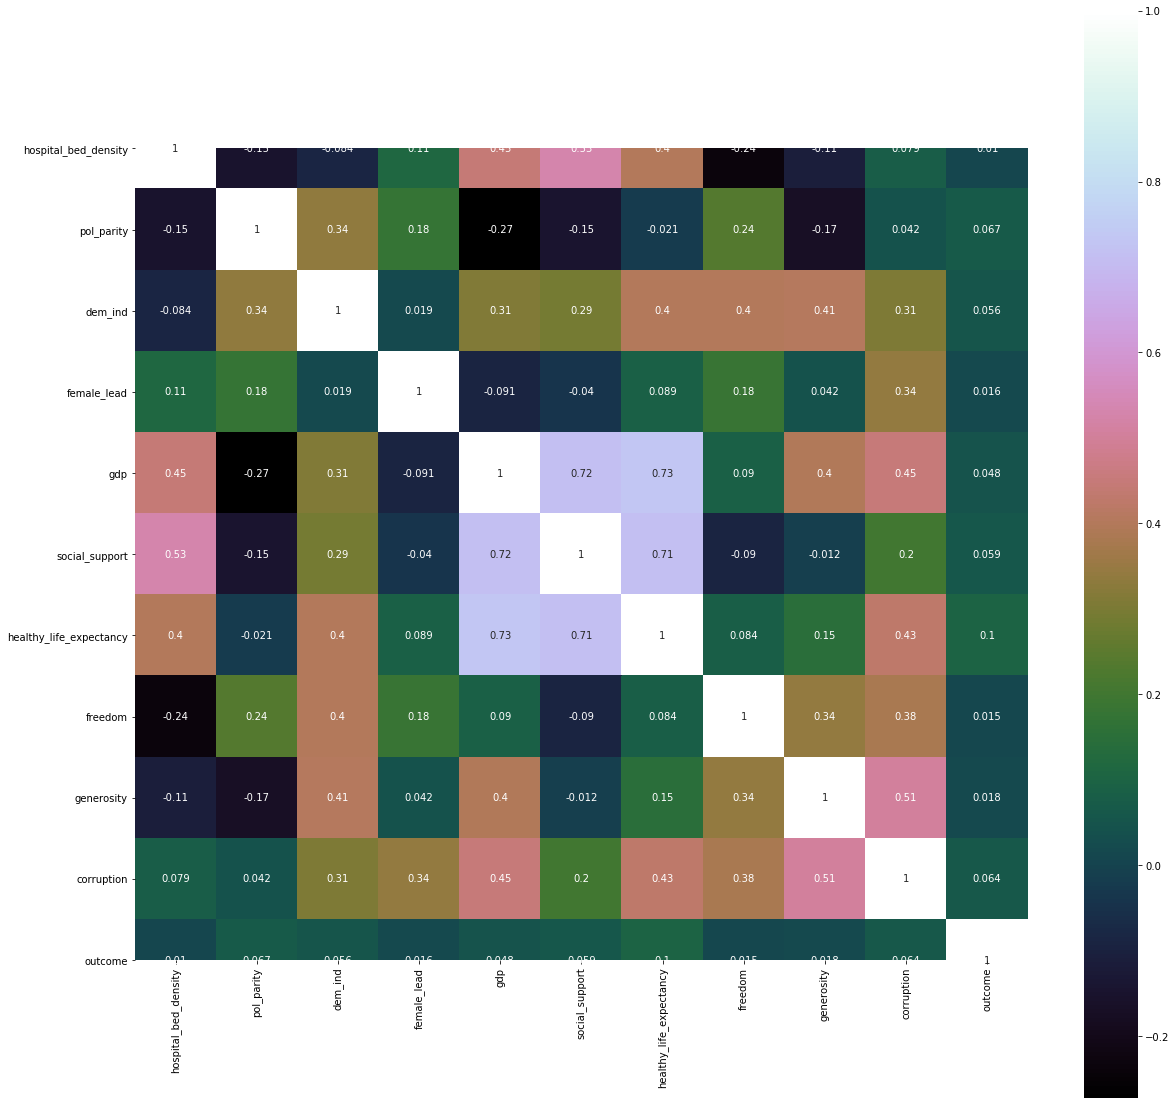

In [ ]:
correlation = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix')

In [ ]:
#### df_country data normalization
df_country['hospital_bed_density'] = df_country['country']
df_country['pol_parity'] = df_country['country']
df_country['dem_ind'] = df_country['country']
df_country['female_lead'] = df_country['country']
df_country['gdp'] = df_country['country']
df_country['social_support'] = df_country['country']
df_country['healthy_life_expectancy'] = df_country['country']
df_country['freedom'] = df_country['country']
df_country['generosity'] = df_country['country']
df_country['corruption'] = df_country['country']

d = pd.read_csv('hbd.csv')
key = []
value = []
for x in range(len(d)):
    key.append(d['country'][x])
    value.append(d['hbd'][x])

w = pd.read_csv('women.csv')
w = w.rename(columns={"Country name": "country", "Political parity score": "pol_parity", "Woman Leader?": "female_lead"})
keys = []
values = []
values1 = []
for x in range(len(w)):
    keys.append(w['country'][x])
    values.append(w['pol_parity'][x])
    values1.append(w['female_lead'][x])
    
h = pd.read_csv('happy.csv')
keys3 = []
values_gdp = []
values_ss = []
values_hle = []
values_flc = []
values_g = []
values_pc = []
for x in range(len(h)):
    keys3.append(h['Country or region'][x])
    values_gdp.append(h['GDP per capita'][x])
    values_ss.append(h['Social support'][x])
    values_hle.append(h['Healthy life expectancy'][x])
    values_flc.append(h['Freedom to make life choices'][x])
    values_g.append(h['Generosity'][x])
    values_pc.append(h['Perceptions of corruption'][x])
    
    
d = pd.read_csv('demind.csv')
keys4 = []
values4 = []
for x in range(len(d)):
    keys4.append(d['country'][x])
    values4.append(d['dem_ind'][x])
    

demin = dict(zip(keys4,values4))    
demin.update({'San Marino': 6.53, 'United Arab Emirates': 2.76, 'Bahamas': 4.36})

polpar = dict(zip(keys,values))

flb = dict(zip(keys, values1))

hbd = dict(zip(key, value))

gdp = dict(zip(keys3, values_gdp))

ss = dict(zip(keys3, values_ss))

hle = dict(zip(keys3, values_hle))

flc = dict(zip(keys3, values_flc))

g = dict(zip(keys3, values_g))

pc = dict(zip(keys3, values_pc))

cleaner4 = {'hospital_bed_density': hbd,
            'pol_parity': polpar,
            'female_lead': flb,
            'dem_ind': demin}

df_country.replace(cleaner4, inplace=True)
df_country.drop(df_country.tail(2).index,inplace=True)

cleaner5 = {'gdp': gdp,
            'social_support': ss, 
            'healthy_life_expectancy': hle, 
            'freedom': flc,
            'generosity': g,
            'corruption': pc}
df_country.replace(cleaner5, inplace=True)
df_country

AttributeError: module 'matplotlib' has no attribute 'figure'

In [ ]:
# explore gradient boosting number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib import pyplot



# get a list of models to evaluate
def get_models():
	models = dict()
	# define number of trees to consider
	n_trees = [10, 50, 100, 500, 1000]
	for n in n_trees:
		models[str(n)] = GradientBoostingClassifier(n_estimators=n)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()